In [2]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

In [3]:
sam = sam_model_registry["default"](checkpoint="./sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)


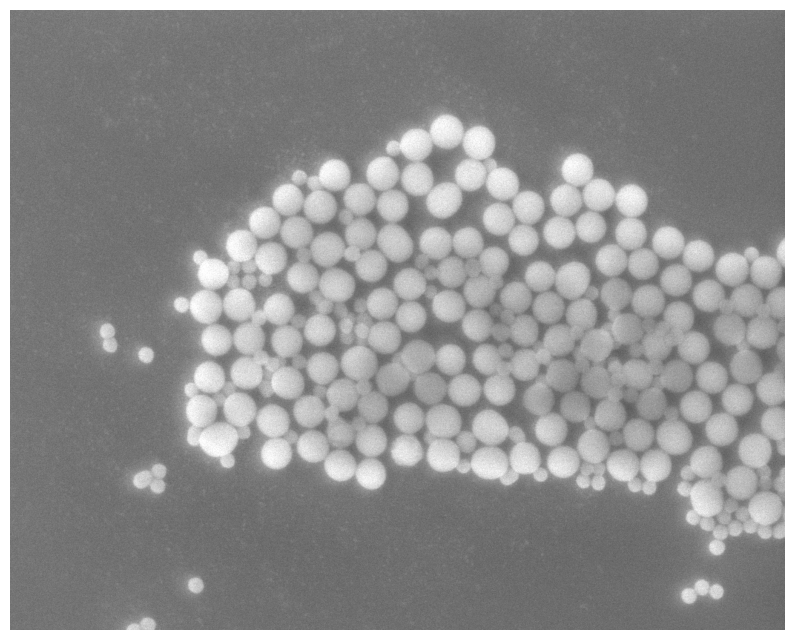

In [4]:
import os
import cv2
import numpy as np

# Specify the folder path containing TIFF images
tiff_folder = './Images/CEA2_MEB'
image = "Image_4_01.tif"
#npy_image = "01_Frame_15_seg.npy"
image_path = os.path.join(tiff_folder, image)
# Load TIFF images

# Convert image to RGB if it is in grayscale
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


In [5]:
image.shape

(1024, 1280, 3)

In [6]:
masks = mask_generator.generate(image)

In [7]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def show_contours_yellow(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(img, contours, -1, (255, 255, 0, 0.35), 2)  # Draw contours in yellow
    ax.imshow(img)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


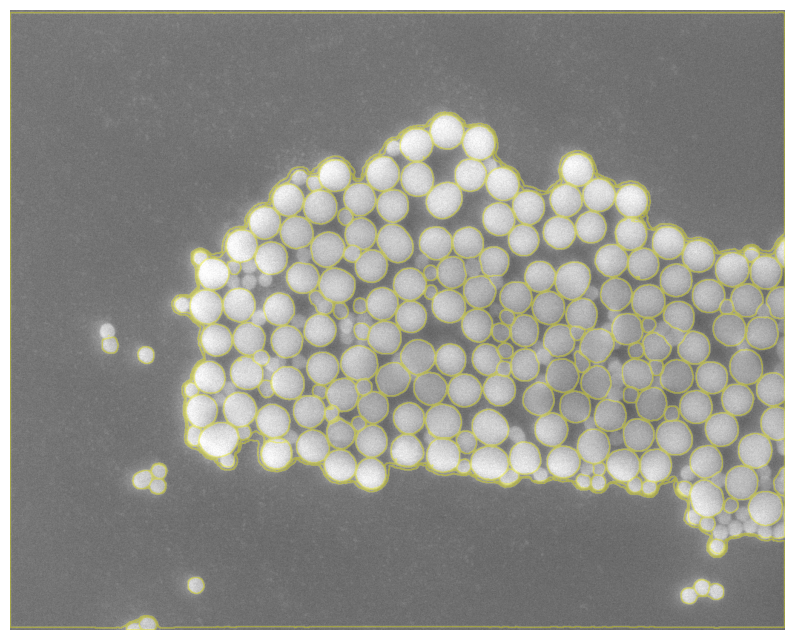

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
show_contours_yellow(masks)
plt.savefig('mask.png')
plt.show()


In [9]:
len(masks)

205